In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Convolution2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D,ZeroPadding2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import model_from_json

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

#### Simple CNN Classifier

In [2]:
gender_model = Sequential()

gender_model.add(Convolution2D(filters = 64, kernel_size = (3, 3),
        padding = 'same',input_shape=(100,100,3), activation = 'relu'))
gender_model.add(MaxPooling2D(pool_size= (2, 2)))
gender_model.add(Convolution2D(filters = 32, kernel_size = (3, 3), 
        padding = 'same', activation = 'relu'))
gender_model.add(MaxPooling2D(pool_size= (2, 2)))
gender_model.add(Dropout(rate = 0.5))
gender_model.add(Flatten())
gender_model.add(Dense(128, activation = 'relu'))
gender_model.add(Dropout(rate = 0.25))
gender_model.add(Dense(64, activation = 'relu'))
gender_model.add(Dropout(rate = 0.5))
gender_model.add(Dense(1, activation='sigmoid'))

gender_model.compile(optimizer='adam', 
        loss='binary_crossentropy', metrics=['accuracy'])

gender_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [3]:
gender_model.load_weights('history/gender_estimator.h5')

In [4]:
with open('history/history_gender.pickle', 'rb') as f:
    history_gender = pickle.load(f)

In [5]:
history_gender

{'loss': [0.374717387570964,
  0.306893359242422,
  0.28364146287130415,
  0.27078202166130266,
  0.259682549757647,
  0.24999686071929084,
  0.24129150870901542,
  0.2352526865135161,
  0.22726257178031375,
  0.22257302255950778,
  0.21660977555313907,
  0.2141926422613654,
  0.21012779339764498,
  0.20532101427049174,
  0.20264939047906255,
  0.19854043644483374,
  0.19575470624206304,
  0.19456989641764075,
  0.19083238230847477,
  0.1897405923849347,
  0.18597630219529862,
  0.1863146222135734,
  0.18520577526178175,
  0.1824648853448477,
  0.18033950411378896,
  0.17886778046486926,
  0.1755982732347549,
  0.17515531897785028,
  0.17397327541604882,
  0.1713298051294146,
  0.16918422975135772,
  0.16666541889031763,
  0.1659170431875424,
  0.1655762727324166,
  0.16337455218901348,
  0.1626489184928789,
  0.15975522489611985,
  0.15861947628967066,
  0.15976891068542506,
  0.1574238278869258,
  0.1552869480461665,
  0.15451319759486679,
  0.15457333614750574,
  0.15458257062638975

In [6]:
imggen = ImageDataGenerator(preprocessing_function=preprocess_input, rescale=1/255.0,validation_split=0.2)

batch_size=32
filepath = '/Users/ivylai/Desktop/Galvanize/tarball-lite/AFAD_gender'
train_datagen_age = imggen.flow_from_directory(filepath, target_size=(100,100),batch_size=batch_size, 
                                           class_mode = 'binary',subset='training')
validation_datagen_age = imggen.flow_from_directory(filepath, target_size=(100,100), batch_size=batch_size
                                                , class_mode = 'binary', subset='validation')

Found 5524 images belonging to 2 classes.
Found 1380 images belonging to 2 classes.


In [37]:
y_pred_proba = gender_model.predict(validation_datagen_age)
y_pred_proba

array([[0.8295677 ],
       [0.9347866 ],
       [0.17308027],
       ...,
       [0.9999924 ],
       [0.997666  ],
       [0.00172555]], dtype=float32)

In [50]:
y_true = np.array([])

for i in range(len(validation_datagen_age)):
    y_true = np.append(y_true, validation_datagen_age[i][1])
    
y_true[y_true == 1] = 2
y_true[y_true == 0] = 1
y_true[y_true == 2] = 0

true_pred_df = pd.DataFrame({'y_true':y_true,'y_pred_proba':y_pred_proba.reshape(-1)})
true_pred_df

,y_true,y_pred_proba
0,1.0,0.829568
1,1.0,0.934787
2,0.0,0.173080
3,1.0,0.999686
4,0.0,0.402449
...,...,...
1375,0.0,0.001201
1376,1.0,0.999175
1377,1.0,0.999992
1378,1.0,0.997666


In [82]:
true_pred_df[(true_pred_df.y_true == 0)&(true_pred_df.y_pred_proba > 0.5)].head()

,y_true,y_pred_proba
8,0.0,0.750613
25,0.0,0.720387
26,0.0,0.548705
71,0.0,0.502325
73,0.0,0.721690


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


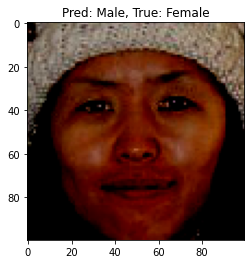

In [105]:
one = validation_datagen_age[0][0] * 255
plt.imshow(one[8])
plt.title('Pred: Male, True: Female');

In [68]:
true_pred_df[(true_pred_df.y_true == 1)&(true_pred_df.y_pred_proba < 0.5)].head(10)

,y_true,y_pred_proba
100,1.0,0.371880
107,1.0,0.073631
109,1.0,0.169829
167,1.0,0.109584
217,1.0,0.253511
221,1.0,0.141567
351,1.0,0.493376
398,1.0,0.158001
433,1.0,0.099980
466,1.0,0.371925


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


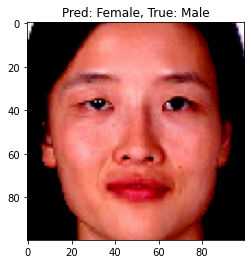

In [97]:
two = validation_datagen_age[3][0] * 255
plt.imshow(two[3])
plt.title('Pred: Female, True: Male');

#### Simple CNN Regressor

In [ ]:
age_model = Sequential()
age_model.add(Convolution2D(filters = 64, kernel_size = (3, 3), 
      padding = 'same',input_shape=(100,100,3), activation = 'relu'))
age_model.add(MaxPooling2D(pool_size= (2, 2)))
age_model.add(Convolution2D(filters = 32, kernel_size = (3, 3), 
                              padding = 'same', activation = 'relu'))
age_model.add(MaxPooling2D(pool_size= (2, 2)))
age_model.add(Dropout(0.5))
age_model.add(Flatten())
age_model.add(Dense(128, activation = 'relu'))
age_model.add(Dense(64, activation = 'relu'))
age_model.add(Dropout(0.5))
age_model.add(Dense(1, activation = 'linear'))

opt = keras.optimizers.Adam(learning_rate=0.0003)
age_model.compile(optimizer=opt, 
                  loss='mean_absolute_error', metrics=['mse'])

age_model.summary()

In [ ]:
age_model.load_weights('history/age_estimator.h5')

In [ ]:
with open('history/history_age.pickle', 'rb') as f:
    history_age = pickle.load(f)

In [ ]:
history_age